In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [45]:
df.shape

(7043, 21)

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [50]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning And Type conversion

In [51]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [52]:
df.drop('customerID', axis=1, inplace=True)

In [53]:
print(df.isnull().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


# EDA

C:\Users\dell\AppData\Local\Temp\ipykernel_7752\2115600710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='coolwarm')


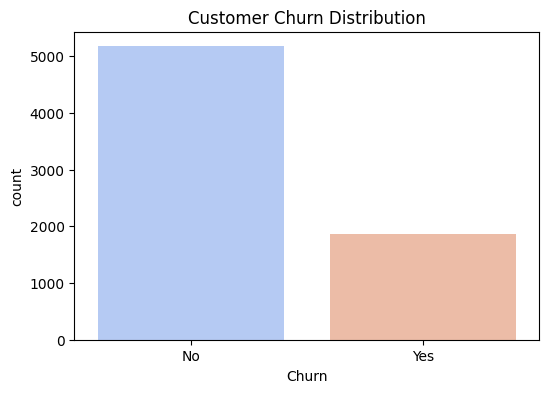

In [54]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()

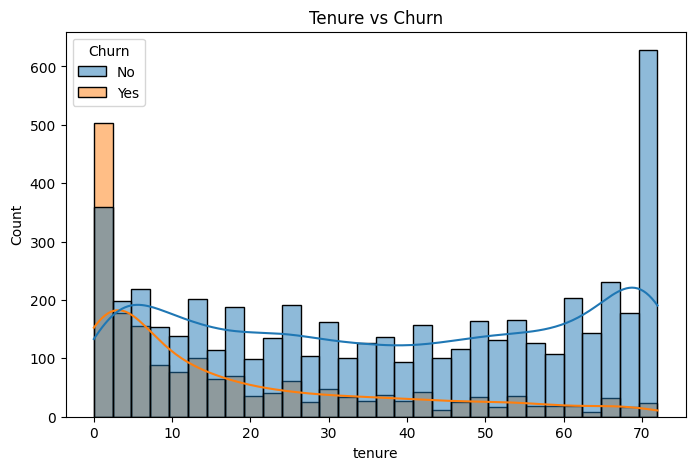

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True)
plt.title('Tenure vs Churn')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_7752\1558227135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')


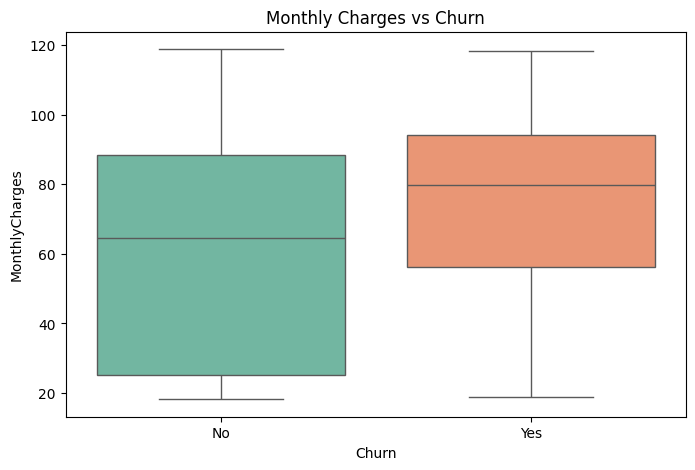

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.show()

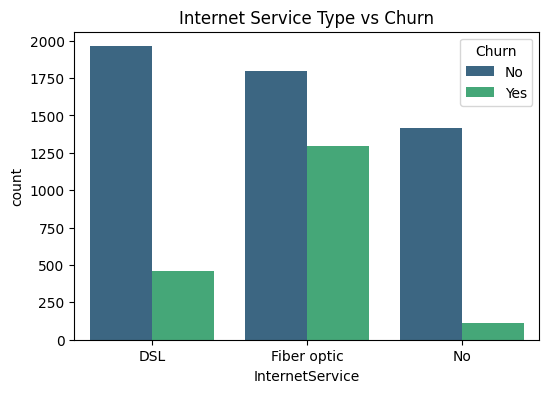

In [57]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='viridis')
plt.title('Internet Service Type vs Churn')
plt.show()

# Encoding Categorical Variables

In [58]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

Categorical Columns: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [59]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_7752\2083555711.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Yes': 1, 'No': 0}, inplace=True)


In [60]:
df = pd.get_dummies(df, drop_first=True)

In [61]:
df.shape

(7043, 31)

# Feature Scaling

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (5634, 30)
Test shape: (1409, 30)


In [67]:
# Step 6: Model Building and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay


In [68]:
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_clf = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=42)

In [69]:
print(X_train)

[[-0.44177295 -0.96923413 -0.65155653 ... -0.52380561  1.40690298
  -0.54384572]
 [-0.44177295  1.03174245  1.53478624 ... -0.52380561 -0.71078107
   1.83875676]
 [-0.44177295  1.03174245  1.53478624 ... -0.52380561 -0.71078107
   1.83875676]
 ...
 [ 2.2636062  -0.96923413 -0.65155653 ... -0.52380561 -0.71078107
   1.83875676]
 [-0.44177295  1.03174245 -0.65155653 ...  1.90910518 -0.71078107
  -0.54384572]
 [-0.44177295 -0.96923413 -0.65155653 ... -0.52380561 -0.71078107
   1.83875676]]


In [71]:

from sklearn import impute


try:
	impute
except NameError:
	from sklearn.impute import SimpleImputer
	imputer = SimpleImputer(strategy='mean')

if np.isnan(X_train).any() or np.isnan(X_test).any():
	X_train = imputer.fit_transform(X_train)
	X_test = imputer.transform(X_test)

log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [73]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf_clf,
    "XGBoost": xgb_clf
}

In [74]:
results = {}

In [75]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results[name] = [acc, roc]
    print(f"\n==== {name} ====")
    print("Accuracy:", round(acc, 4))
    print("ROC-AUC:", round(roc, 4))
    print(classification_report(y_test, y_pred))


==== Logistic Regression ====
Accuracy: 0.807
ROC-AUC: 0.8416
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


==== Random Forest ====
Accuracy: 0.7885
ROC-AUC: 0.8262
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


==== XGBoost ====
Accuracy: 0.785
ROC-AUC: 0.8311
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accura

# Compare Model

In [76]:
results_df = pd.DataFrame(results, index=['Accuracy', 'ROC-AUC'])
print("\nModel Comparison:\n", results_df.T.sort_values(by='ROC-AUC', ascending=False))



Model Comparison:
                      Accuracy   ROC-AUC
Logistic Regression  0.806955  0.841600
XGBoost              0.784954  0.831136
Random Forest        0.788502  0.826197


# Confusion Matrix Visualization

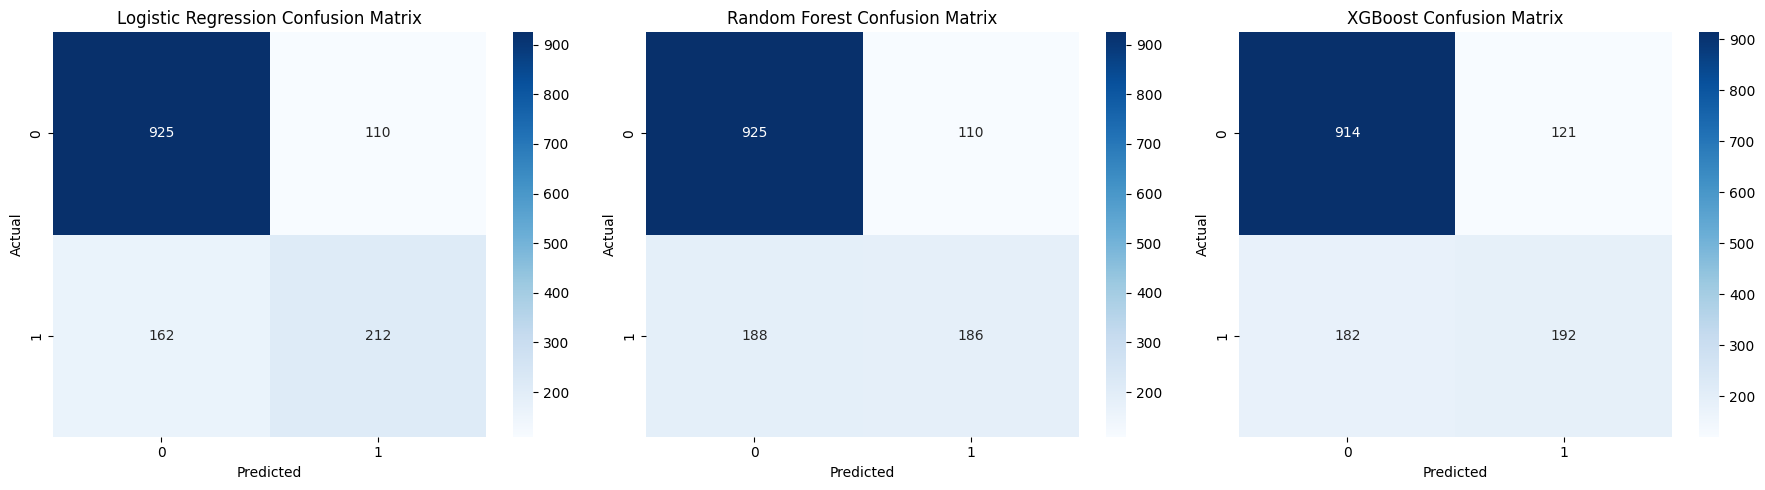

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18,5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()


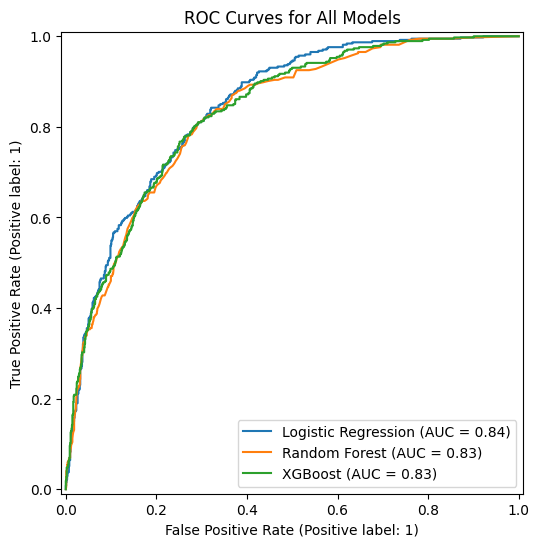

In [78]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=plt.gca(), name=name)
plt.title("ROC Curves for All Models")
plt.show()


In [79]:
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-10:]

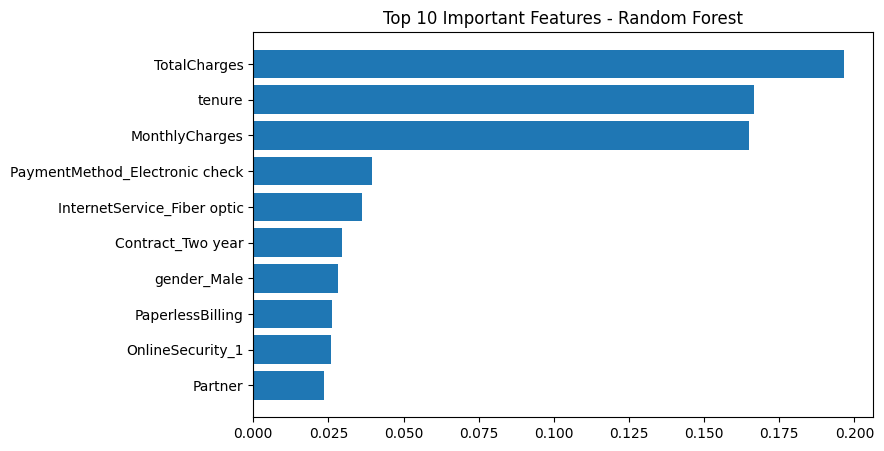

In [80]:
plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [ ]:
print("✅ Key Findings & Business Insights:")
print("""
1️⃣ Customers with short tenure and high monthly charges are more likely to churn.
2️⃣ Month-to-month contracts have the highest churn rate.
3️⃣ Customers without online security and tech support churn more.
4️⃣ Fiber optic internet users show higher churn — possibly due to cost or issues.
5️⃣ Senior citizens have higher churn probability compared to younger users.
""")


✅ Key Findings & Business Insights:

1️⃣ Customers with short tenure and high monthly charges are more likely to churn.
2️⃣ Month-to-month contracts have the highest churn rate.
3️⃣ Customers without online security and tech support churn more.
4️⃣ Fiber optic internet users show higher churn — possibly due to cost or issues.
5️⃣ Senior citizens have higher churn probability compared to younger users.

